In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [4]:
# d = pd.read_excel('dane.xlsx')
d = pd.read_csv('dane2.csv', delimiter=';')

In [5]:
d.head()

,id,ocena,autorytet,natezenie
0,1,t,j,39
1,2,t,j,50
2,3,n,j,22
3,4,n,j,40
4,5,t,j,48


In [6]:
d.autorytet.value_counts()

j    30
b    30
Name: autorytet, dtype: int64

# Średnie i odchylenia

In [7]:
gr = d.groupby(['autorytet'])

#### Średnie w grupach:

In [8]:
round(gr.natezenie.mean(), 2)

autorytet
b    33.90
j    36.23
Name: natezenie, dtype: float64

#### Odchylenia standardowe:

In [9]:
round(gr.natezenie.std(), 2)

autorytet
b    11.54
j    10.70
Name: natezenie, dtype: float64

# Boxplot

Poniżej wykres gotowy do wklejenia do artykułu. Plik png w wysokiej rozdzielczości w załączniku.

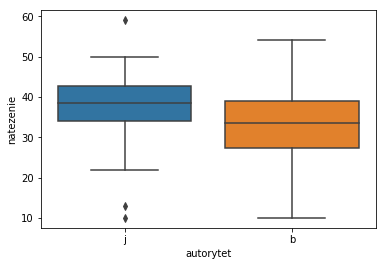

In [15]:
sns.boxplot(x=d.autorytet, y=d.natezenie)
plt.savefig('boxplot2.png', dpi=150)

# Test t

Test t Studenta odpowiada nam na pytanie, czy istnieją istotne statystycznie różnice pomiędzy średnimi. W tym przypadku nie udało się wykryć różnic pomiędzy średnimi, ale jestście BARDZO NA GRANICY... (być może jeszcze 5 osób w każdej grupie i by wyszło). Mimo to różnice te są nieistotne. Opisując wyniki należy po podaniu wartości śrendnich i odchyleń standardowych napisać coś takiego (oczywiście uzupełnijcie ZZ i ZN).

> Różnice w ZZ pod względem ZN okazały się istotne statystycznie; t = -1.882 ; p > 0,05.

In [16]:
from scipy import stats

In [17]:
res = stats.ttest_ind(d.loc[d['autorytet'] == 'j', 'natezenie'],
               d.loc[d['autorytet'] == 'b', 'natezenie'])

In [18]:
print('t =', round(res[0], 3), '; p = ', round(res[1], 3))

t = 0.812 ; p =  0.42
